In [1]:
# !pip install category_encoders

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering

from sklearn.preprocessing import MaxAbsScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import category_encoders as ce
from scipy.cluster.hierarchy import dendrogram, ward, average, complete

In [3]:
df = pd.read_excel('dataset_saham 2021-2023.xlsx')
df

,Kode,Nama Perusahaan,Sektor,Industri,EPS,S_0,S_1,S_2,S_3,Avg Volume,Dividen,Percentage Dividen,Mean Log Return,Std Log Return,PER
0,ACES,Ace Hardware Indonesia Tbk.,Consumer Cyclical,Industry: Specialty Retail,46.66,1700.000000,1280.0000,496.0,720,5.622253e+07,83.800001,0.116389,-0.001175,0.026282,15.430776
1,ADRO,Adaro Energy Indonesia Tbk.,Energy,Industry: Thermal Coal,910.90,1455.000000,2250.0000,3850.0,2380,9.889297e+07,1059.869959,0.445324,0.000673,0.026537,2.612801
2,AKRA,AKR Corporindo Tbk,Energy,Industry: Oil & Gas Refining & Marketing,129.17,654.000000,822.0000,1400.0,1475,5.146311e+07,194.000000,0.131525,0.001113,0.024865,11.419060
3,AMRT,Sumber Alfaria Trijaya Tbk.,Consumer Defensive,Industry: Grocery Stores,79.20,800.000000,1215.0000,2650.0,2930,3.363999e+07,52.140000,0.017795,0.001776,0.026814,36.994949
4,ANTM,Aneka Tambang Tbk.,Basic Materials,Industry: Gold,168.19,2190.000000,2250.0000,1985.0,1705,1.473929e+08,134.978203,0.079166,-0.000342,0.028690,10.137345
5,ARTO,Bank Jago Tbk,Financial Services,Industry: Banks - Regional,1.70,3516.352295,16000.0000,3720.0,2900,2.408157e+07,0.000000,0.000000,-0.000264,0.043036,1705.882353
6,ASII,Astra International Tbk,Consumer Cyclical,Industry: Auto Parts,773.92,6225.000000,5700.0000,5700.0,5650,4.786175e+07,1064.000000,0.188319,-0.000133,0.017639,7.300496
7,BBCA,Bank Central Asia Tbk.,Financial Services,Industry: Banks - Regional,389.94,6835.000000,7300.0000,8550.0,9400,8.437126e+07,478.900002,0.050947,0.000436,0.013412,24.106273
8,BBNI,Bank Negara Indonesia (Persero) Tbk.,Financial Services,Industry: Banks - Regional,546.56,3187.500000,3375.0000,4612.5,5375,6.167185e+07,583.099611,0.108484,0.000715,0.017223,9.834236
9,BBRI,Bank Rakyat Indonesia (Persero) Tbk,Financial Services,Industry: Banks - Regional,369.72,4310.000000,4110.0000,4940.0,5725,1.502938e+08,552.385562,0.096487,0.000388,0.016697,15.484691


In [4]:
fitur1 = df[['Sektor', 'EPS', 'S_3', 'Avg Volume', 'Percentage Dividen', 'Mean Log Return', 'Std Log Return', 'PER']]

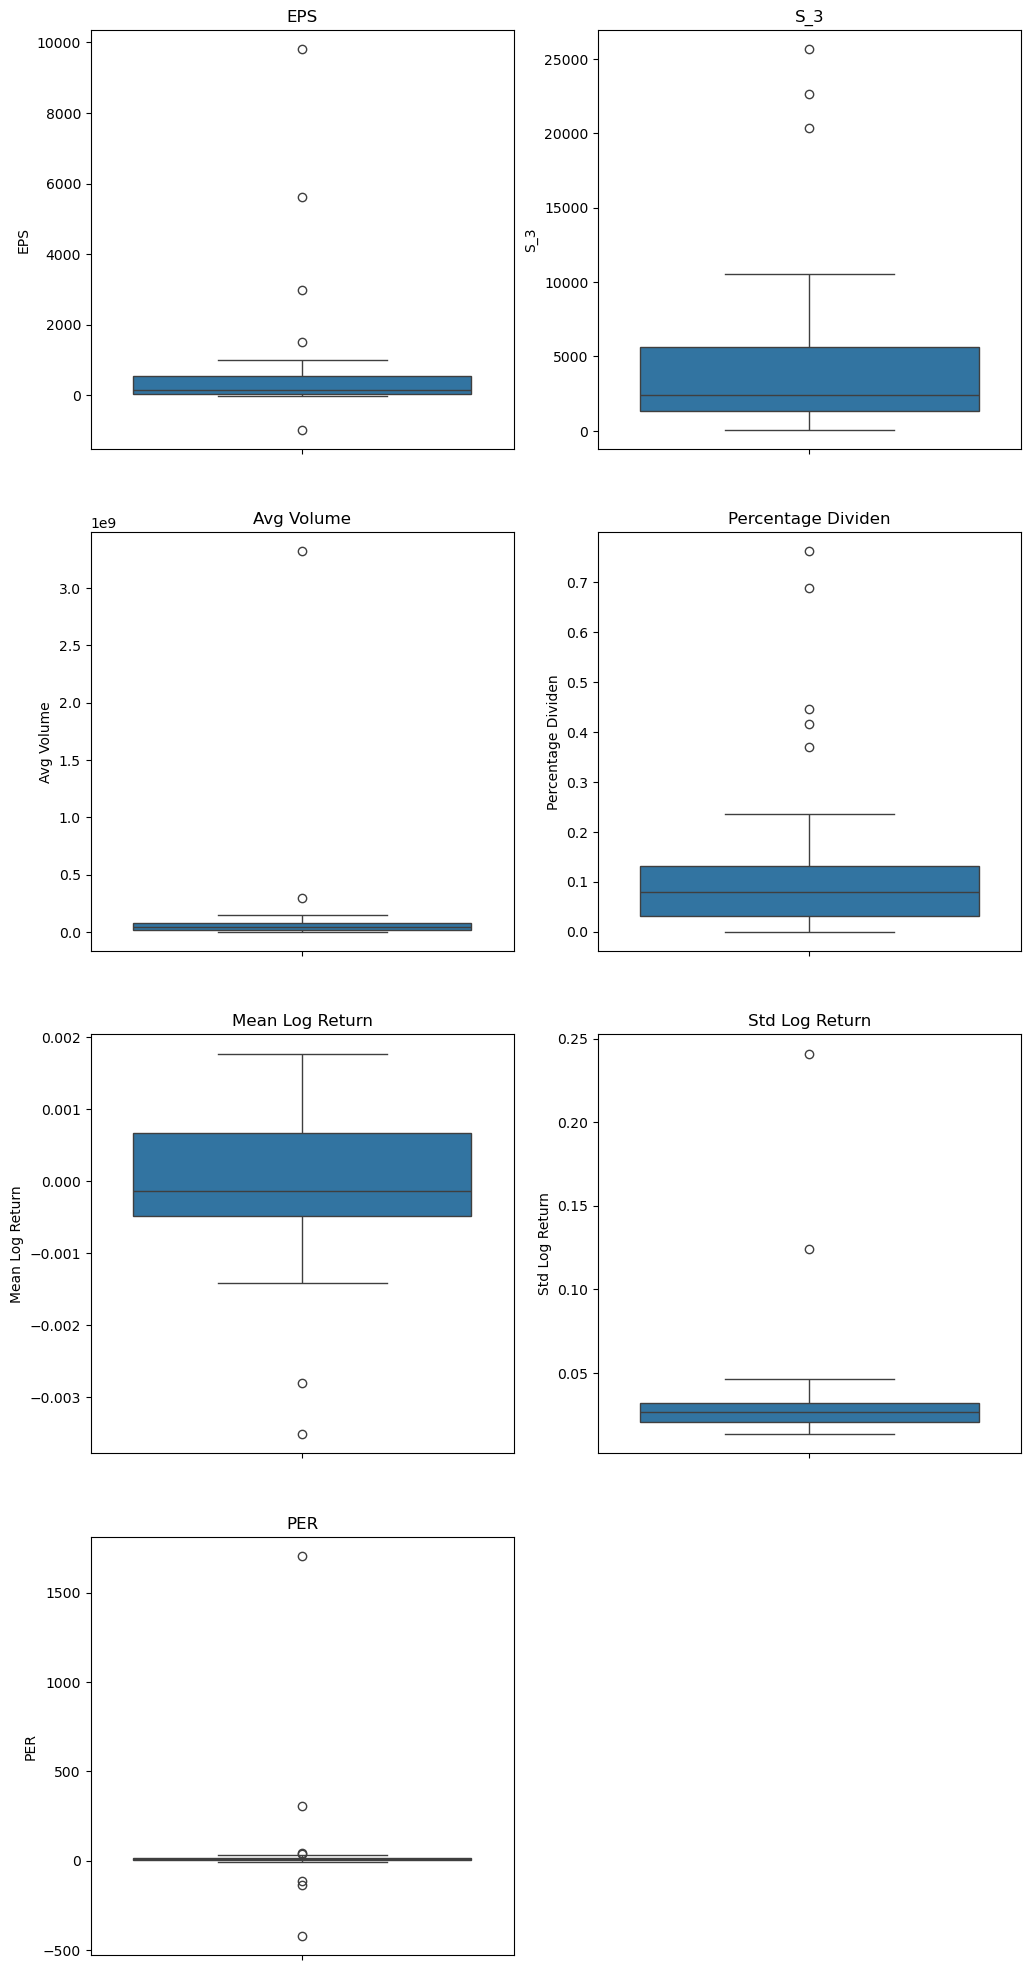

In [5]:
fitur=['EPS', 'S_3', 'Avg Volume', 'Percentage Dividen', 'Mean Log Return', 'Std Log Return', 'PER']

plt.figure(figsize=(12, 25))

for i, feature in enumerate(fitur, 1):
    plt.subplot(4, 2, i)  # Adjust the number of subplots based on the length of 'fitur'
    sns.boxplot(fitur1[feature])  # Assuming 'fitur1' is your DataFrame or dictionary containing data for each feature
    plt.title(feature)

In [6]:
# Extract the 'Sektor' column for one-hot encoding
sektor_column = fitur1[['Sektor']]
binary_encoder = ce.BinaryEncoder()


# Extract the remaining columns for Max-Abs scaling
other_columns = fitur1.drop(columns=['Sektor'])

# Define the transformers for one-hot encoding and Max-Abs scaling
preprocessor = ColumnTransformer(
    transformers=[
        ('binary encoding',binary_encoder,sektor_column.columns.tolist()),
        ('MaxAbsScaler', MaxAbsScaler(), other_columns.columns.tolist())
    ],
    remainder='passthrough'
)

# Create a pipeline with the defined preprocessor
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit and transform the data
transformed_data = pipeline.fit_transform(fitur1)

# Extract column names after transformation
column_names = list(preprocessor.transformers_[0][1].get_feature_names()) + other_columns.columns.tolist()

# Convert the transformed data back to a DataFrame
transformed_df = pd.DataFrame(transformed_data, columns=column_names)

# Display the transformed DataFrame
transformed_df

C:\Users\giova\anaconda3\Lib\site-packages\category_encoders\utils.py:366: FutureWarning: `get_feature_names` is deprecated in all of sklearn. Use `get_feature_names_out` instead.
  warnings.warn("`get_feature_names` is deprecated in all of sklearn. Use `get_feature_names_out` instead.",


,Sektor_0,Sektor_1,Sektor_2,Sektor_3,EPS,S_3,Avg Volume,Percentage Dividen,Mean Log Return,Std Log Return,PER
0,0.0,0.0,0.0,1.0,0.004758,0.028070,0.016938,0.152908,-0.335069,0.109009,0.009046
1,0.0,0.0,1.0,0.0,0.092882,0.092788,0.029793,0.585050,0.191921,0.110064,0.001532
2,0.0,0.0,1.0,0.0,0.013171,0.057505,0.015504,0.172793,0.317196,0.103131,0.006694
3,0.0,0.0,1.0,1.0,0.008076,0.114230,0.010135,0.023379,0.506288,0.111212,0.021687
4,0.0,1.0,0.0,0.0,0.017150,0.066472,0.044404,0.104006,-0.097633,0.118992,0.005943
5,0.0,1.0,0.0,1.0,0.000173,0.113060,0.007255,0.000000,-0.075160,0.178498,1.000000
6,0.0,0.0,0.0,1.0,0.078914,0.220273,0.014419,0.247406,-0.037799,0.073158,0.004280
7,0.0,1.0,0.0,1.0,0.039761,0.366472,0.025418,0.066932,0.124278,0.055625,0.014131
8,0.0,1.0,0.0,1.0,0.055731,0.209552,0.018580,0.142522,0.203788,0.071434,0.005765
9,0.0,1.0,0.0,1.0,0.037699,0.223197,0.045278,0.126761,0.110725,0.069251,0.009077


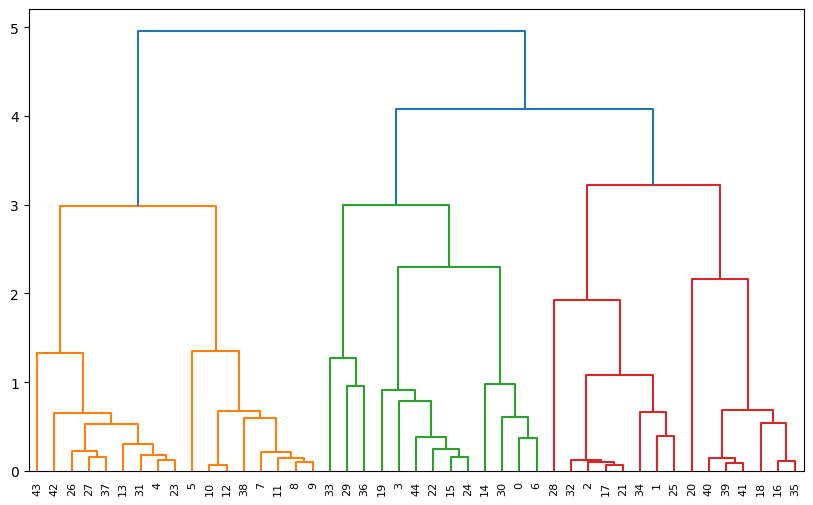

In [7]:
plt.figure(figsize=(10,6))
linkage_array=ward(transformed_df)
dendrogram(linkage_array)
plt.show()

2 kluster jarak 5 <br/>
3 kluster jarak 4.1 <br/>
4 kluster jarak 3.3 <br/>
5 kluster jarak 3.1 <br/>
6 kluster jarak 3 <br/>

Kesimpulan: 2 kluster adalah yang terbaik

In [8]:
# Create AgglomerativeClustering instance with Complete linkage
complete_clustering = AgglomerativeClustering(n_clusters=2, linkage='ward')

# Fit the model and predict cluster labels
label = complete_clustering.fit_predict(transformed_df)

In [9]:
df['Ward Cluster'] = label

In [10]:
df

,Kode,Nama Perusahaan,Sektor,Industri,EPS,S_0,S_1,S_2,S_3,Avg Volume,Dividen,Percentage Dividen,Mean Log Return,Std Log Return,PER,Ward Cluster
0,ACES,Ace Hardware Indonesia Tbk.,Consumer Cyclical,Industry: Specialty Retail,46.66,1700.000000,1280.0000,496.0,720,5.622253e+07,83.800001,0.116389,-0.001175,0.026282,15.430776,0
1,ADRO,Adaro Energy Indonesia Tbk.,Energy,Industry: Thermal Coal,910.90,1455.000000,2250.0000,3850.0,2380,9.889297e+07,1059.869959,0.445324,0.000673,0.026537,2.612801,0
2,AKRA,AKR Corporindo Tbk,Energy,Industry: Oil & Gas Refining & Marketing,129.17,654.000000,822.0000,1400.0,1475,5.146311e+07,194.000000,0.131525,0.001113,0.024865,11.419060,0
3,AMRT,Sumber Alfaria Trijaya Tbk.,Consumer Defensive,Industry: Grocery Stores,79.20,800.000000,1215.0000,2650.0,2930,3.363999e+07,52.140000,0.017795,0.001776,0.026814,36.994949,0
4,ANTM,Aneka Tambang Tbk.,Basic Materials,Industry: Gold,168.19,2190.000000,2250.0000,1985.0,1705,1.473929e+08,134.978203,0.079166,-0.000342,0.028690,10.137345,1
5,ARTO,Bank Jago Tbk,Financial Services,Industry: Banks - Regional,1.70,3516.352295,16000.0000,3720.0,2900,2.408157e+07,0.000000,0.000000,-0.000264,0.043036,1705.882353,1
6,ASII,Astra International Tbk,Consumer Cyclical,Industry: Auto Parts,773.92,6225.000000,5700.0000,5700.0,5650,4.786175e+07,1064.000000,0.188319,-0.000133,0.017639,7.300496,0
7,BBCA,Bank Central Asia Tbk.,Financial Services,Industry: Banks - Regional,389.94,6835.000000,7300.0000,8550.0,9400,8.437126e+07,478.900002,0.050947,0.000436,0.013412,24.106273,1
8,BBNI,Bank Negara Indonesia (Persero) Tbk.,Financial Services,Industry: Banks - Regional,546.56,3187.500000,3375.0000,4612.5,5375,6.167185e+07,583.099611,0.108484,0.000715,0.017223,9.834236,1
9,BBRI,Bank Rakyat Indonesia (Persero) Tbk,Financial Services,Industry: Banks - Regional,369.72,4310.000000,4110.0000,4940.0,5725,1.502938e+08,552.385562,0.096487,0.000388,0.016697,15.484691,1


In [11]:
#df.to_excel('df_clean.xlsx', index=False)

## 